In [1]:
# %pip install matplotlib
# import cv2
import numpy as np
from IPython.display import Image as display_image
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import colors



In [2]:
def apply_mask(img, mask):
    xi, yi = img.shape
    xm, ym = mask.shape
    img_out = np.zeros([xi, yi])
    xm_offset = xm//2 + xm%2
    ym_offset = ym//2 + ym%2

    for j in range(yi):
        for i in range(xi):
            # if i > xm//2 and j > ym//2 and xi-i > xm//2 and yi-j > ym//2 : # confirm boundaries
            if i > xm_offset+1 and j > ym_offset+1 and xi-i > xm_offset +1 and yi-j > ym_offset +1 : # confirm boundaries
                temp = 0
                for l in range(ym):
                    for k in range(xm):
                        temp += mask[k][l]*img[i+k-xm_offset][j+l-ym_offset]
                img_out[i][j] = temp
    return img_out

In [3]:
def fx(img):
    mask = np.array([[1, -1]])
    # print(mask.shape)
    img_out = apply_mask(img, mask)
    return img_out

def fy(img):
    mask = np.array([[1], [-1]])
    # print(mask.shape)
    img_out = apply_mask(img, mask)
    return img_out

def magnitude(x,y):
    M = np.sqrt(x**2 + y**2)
    return M

def gradient_magnitude(y, x):
    angle = np.rad2deg(np.arctan2(y,x)) + 180
    return angle

def non_maximum_suppression(M, phi):
    angle_value = (((phi %360) + 22.5) //45) % 4
    value_to_dxdy = {0: (0,1),1: (1,1),2: (1,0),3: (1,-1)}
    m_shape = M.shape
    nms = np.zeros(m_shape)
    for i in range(1, m_shape[0]-1):
        for j in range(1, m_shape[1]-1):
            dx, dy = value_to_dxdy[angle_value[i,j]]
            if M[i-dx,j-dy] < M[i,j] > M[i+dx,j+dy]:
                nms[i,j] = M[i,j]

    return angle_value, nms

def followEdge(th, tl, nms, HT, visited, x, y, count=0):
    values = {0: (0,1),1: (1,1),2: (1,0),3: (1,-1)}
    if count >= 10000:
        return
    
    if (x,y) in visited:
        return
    else:
        visited[(x,y)] = True

    if nms[x,y] >= tl:
        HT[x,y] = nms[x,y]
        # check neighbors recursively
        for dx,dy in values.values():
            for factor in (1,-1):
                x2, y2 = x+dx*factor, y+dy*factor
                if nms[x2,y2] >= tl:
                    followEdge(th,tl,nms,HT,visited,x2,y2,count+1)

def hysterisis_thresholding(nms, t_h=5, t_l=10):
    nms_shape = nms.shape
    temp = np.zeros(nms_shape)
    HT = np.zeros(nms_shape)
    temp[1:-1,1:-1] = nms[1:-1,1:-1]
    visited = {}
    for i in range(nms_shape[0]):
        for j in range(nms_shape[1]):
            if temp[i,j] >= t_h:
                if not (i,j) in visited:
                    followEdge(t_h, t_l, temp, HT, visited, i, j)

    return HT

## Read image

(370, 265)


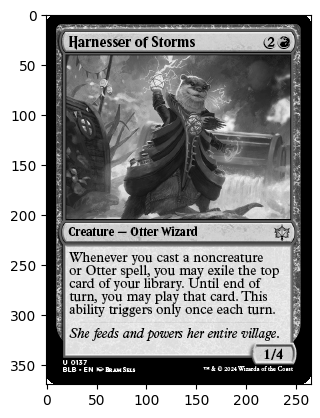

In [4]:
img = np.uint8(np.average(mpimg.imread('MSCS23002_Rizwan_01/Image_070.jpeg', ), axis=2, 
                          weights=[0.2,0.6,0.2,0]
                          )*255)
print(img.shape)
plt.imshow(img,cmap='gray')

(370, 265)


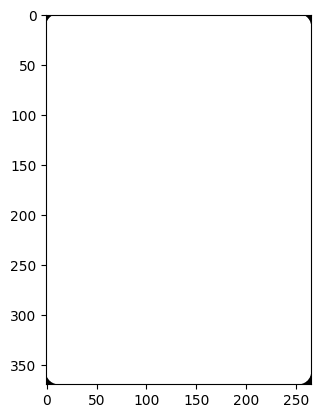

In [5]:
img_ = mpimg.imread('MSCS23002_Rizwan_01/Image_070.jpeg')
img = np.uint8(np.average(img_, axis=2, 
                          weights=[0.2,0.6,0.2,0]
                          )*img_[:,:,-1]*255)
print(img.shape)
plt.imshow(img_[:,:,-1],cmap='gray')

## Fx

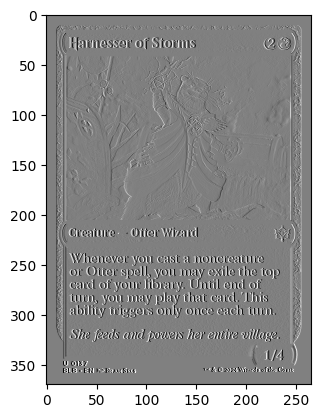

In [6]:
# dfx = np.uint8((fx(img)+255)/2)
dfx = fx(img)
plt.imshow(dfx, cmap='gray')

## Fy

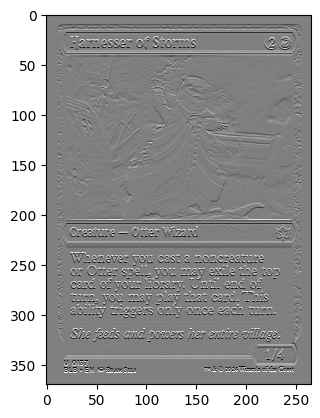

In [7]:
# dfy = np.uint8((fy(img)+255)/2)
dfy = fy(img)
plt.imshow(dfy, cmap='gray')

## Magnitude

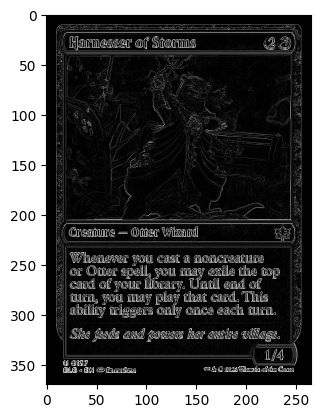

In [8]:
M = magnitude(dfx,dfy)
plt.imshow(M, cmap='gray')

## Gradient Direction

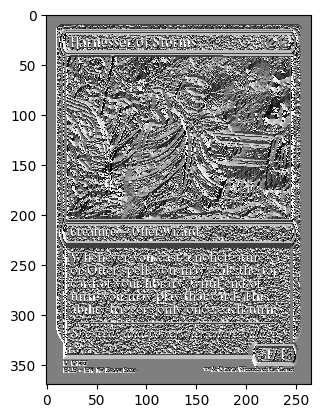

In [9]:
gradient_direction = gradient_magnitude(dfy, dfx)
plt.imshow(gradient_direction, cmap='gray')

## Non-maximum Suppression

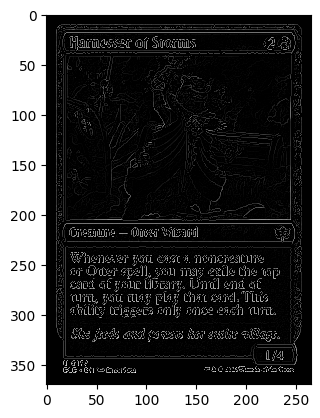

In [10]:
angle_value, nms = non_maximum_suppression(M,gradient_direction)
plt.imshow(nms, cmap='gray')

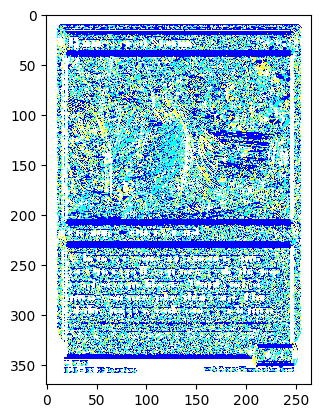

In [11]:
plt.imshow(angle_value, cmap=colors.ListedColormap(['white','cyan','red','blue','yellow']))

## Hysterisis Thresholding

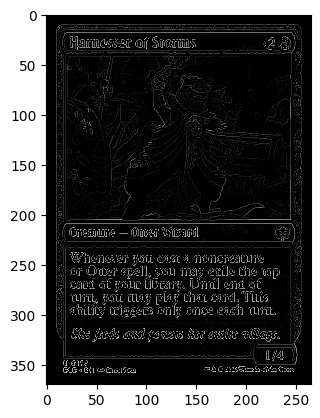

In [12]:
ht = hysterisis_thresholding(nms)
plt.imshow(ht, cmap='gray')